# Assignment 1
### Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('./data/changes-visitors-covid.csv')
df1 = df1[df1.Entity == "India"]
df1.rename(columns = {'Entity': 'location', 'Code':'iso_code', 'Day':'date'}, inplace = True)
print(df1.shape)
df1.head()

(471, 9)


,location,iso_code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143


In [3]:
df2 = pd.read_csv('./data/covid-data.csv', usecols = ['iso_code', 'continent', 'location', 'date', 'new_cases'])
df2 = df2[df2.iso_code == 'IND']
print(df2.head(5))
print(df2.shape)

      iso_code continent location        date  new_cases
38584      IND      Asia    India  2020-01-30        1.0
38585      IND      Asia    India  2020-01-31        0.0
38586      IND      Asia    India  2020-02-01        0.0
38587      IND      Asia    India  2020-02-02        1.0
38588      IND      Asia    India  2020-02-03        1.0
(491, 5)


In [4]:
covid_data = pd.merge(df1, df2, on = ['date', 'location', 'iso_code'])
covid_data.head()

,location,iso_code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,continent,new_cases
0,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000,Asia,0.0
1,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000,Asia,0.0
2,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200,Asia,0.0
3,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333,Asia,0.0
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143,Asia,0.0


In [5]:
covid_data.nunique()
#since there are only unique values in 'location', 'iso_code', 'continent' we can drop these columns

location                   1
iso_code                   1
date                     471
retail_and_recreation    262
grocery_and_pharmacy     268
residential              143
transit_stations         270
parks                    254
workplaces               253
continent                  1
new_cases                448
dtype: int64

In [6]:
covid_data = covid_data.drop(['location', 'iso_code', 'continent'], axis = 1)
covid_data.head(1)

,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,2020-02-17,0.667,1.667,0.0,2.0,3.0,3.0,0.0


### Data Cleaning

In [7]:
mobility_columns = ['retail_and_recreation', 'grocery_and_pharmacy', 'residential' ,'transit_stations' ,'parks','workplaces']

In [8]:
covid_data.dtypes

date                      object
retail_and_recreation    float64
grocery_and_pharmacy     float64
residential              float64
transit_stations         float64
parks                    float64
workplaces               float64
new_cases                float64
dtype: object

In [9]:
#checking for any null values
covid_data.isnull().sum(axis = 0)

date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
residential              0
transit_stations         0
parks                    0
workplaces               0
new_cases                0
dtype: int64

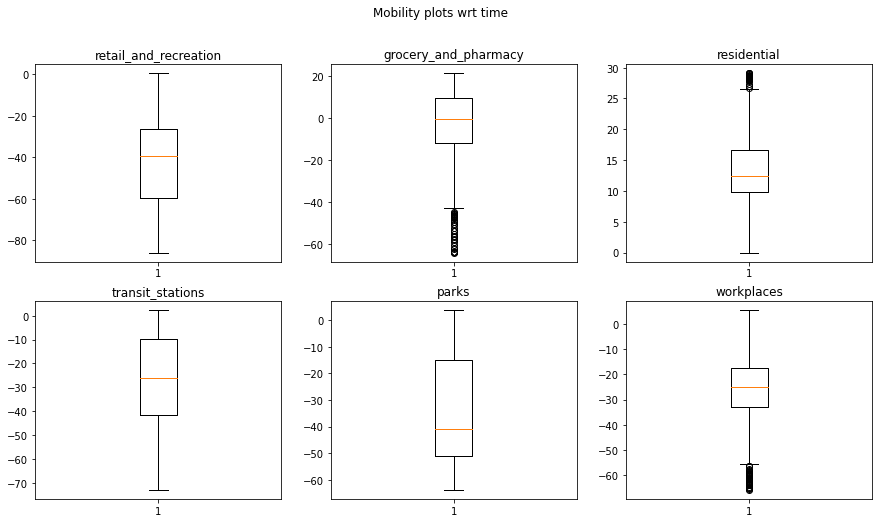

In [10]:
fig, plots = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Mobility plots wrt time')
for i, column in enumerate(mobility_columns):
    ax = plots[i//3][i%3]
    ax.boxplot(covid_data[column])
    ax.set_title(column)

No null values exist in our dataset

### Saving the clean data for separate use in model.py

In [11]:
covid_data.to_csv('./data/covid_data_india.csv',index = False)

In [12]:
# visualizing the dataset

<AxesSubplot:>

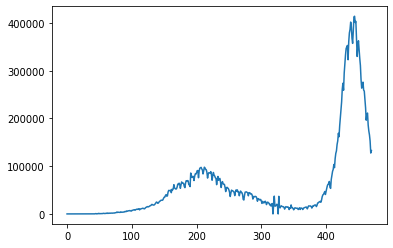

In [13]:
covid_data.new_cases.plot()
# we can see that the target column is basically a time series which has to be predicted, 
# given the corresponding mobility data.
# this is indeed the actual data that can we verified from google. (this statement is logical pertaining to this scenario only)

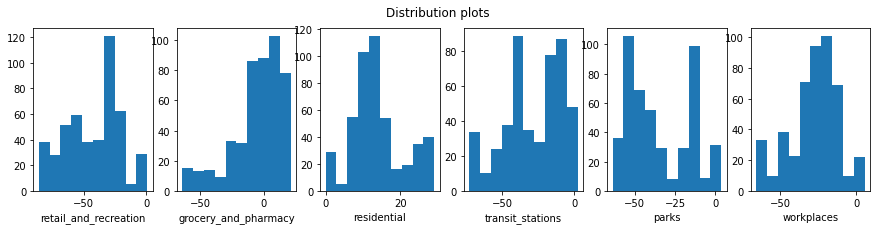

In [14]:
fig, plots = plt.subplots(1,6)
fig.set_figheight(3)
fig.set_figwidth(15)
fig.suptitle('Distribution plots')
for i, column in enumerate(mobility_columns):
    plots[i].hist(covid_data[column])
    plots[i].set_xlabel(column)
#     plots[i].xlabel(column)

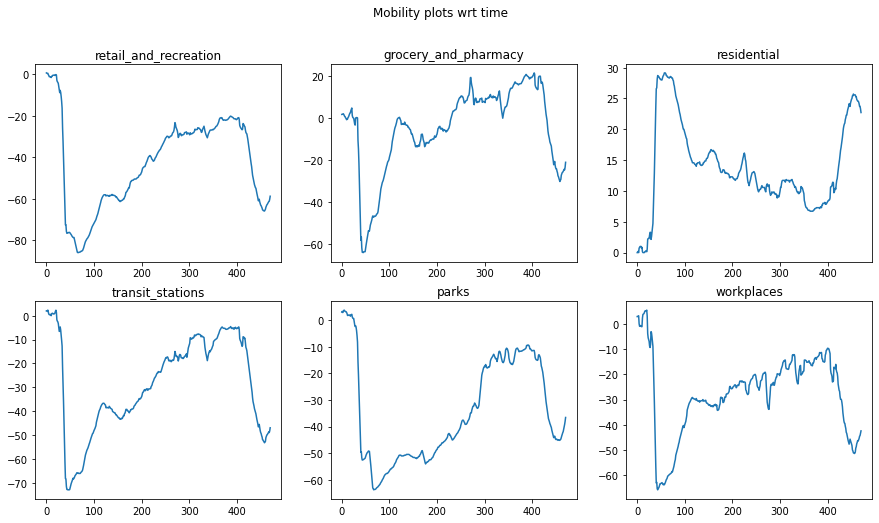

In [15]:
fig, plots = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Mobility plots wrt time')
for i, column in enumerate(mobility_columns):
    ax = plots[i//3][i%3]
    ax.plot(covid_data[column])
    ax.set_title(column)

we can see that the plots follow similar trends wrt time axis. Plot[1][3] is however following a trend that seems to be reverse of others. This should obviously be because people preferred staying at home due to the scenario. Also looking at residential and workspace closely, the trends seem to be almost mirror images of each other.  
Also we have to consider that in all cases 0 or a number slightly higher than 0 must have been the base line quantity in the pre covid era

In [16]:
# correlation matrix for dataset
covid_data.corr()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
retail_and_recreation,1.000000,0.820786,-0.925891,0.970580,0.906370,0.928552,-0.134351
grocery_and_pharmacy,0.820786,1.000000,-0.840430,0.913562,0.664009,0.867805,-0.052792
residential,-0.925891,-0.840430,1.000000,-0.928817,-0.768427,-0.969960,0.313037
transit_stations,0.970580,0.913562,-0.928817,1.000000,0.880851,0.951951,-0.153770
parks,0.906370,0.664009,-0.768427,0.880851,1.000000,0.794867,-0.119766
workplaces,0.928552,0.867805,-0.969960,0.951951,0.794867,1.000000,-0.232405
new_cases,-0.134351,-0.052792,0.313037,-0.153770,-0.119766,-0.232405,1.000000
